## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [0]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [0]:
def build_mlp(input_shape, output_units=10, num_neurons = [512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons) : 
        if i == 0:
          x= keras.layers.Dense(units=n_units, activation ="relu", name = "hidden_layer"+str(i+1))(input_layer)
        else:
          x= keras.layers.Dense(units=n_units, activation ="relu", name = "hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units, activation = "softmax",name="out")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out] )
    return model

In [0]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0,0.3,0.6,0.9]

In [25]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for MT in MOMENTUM:
  keras.backend.clear_session()
  print ("Experiment with MOMENTUM = %.6f" % (MT))
  model = build_mlp(input_shape=x_train.shape[1:])
  model.summary()
  optimizer = keras.optimizers.SGD(lr=LEARNING_RATE,nesterov=True,momentum = MT )
  model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
  
  model.fit (x_train, y_train, 
            epochs=EPOCHS,
            batch_size=BATCH_SIZE, 
            validation_data=(x_test, y_test), 
            shuffle=True)
  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  exp_name_tag = "exp-MT-%s" % str(MT)
  results[exp_name_tag] = {'train-loss': train_loss,
                            'valid-loss': valid_loss,
                            'train-acc': train_acc,
                            'valid-acc': valid_acc}

W0807 08:01:07.216897 139947514595200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Experiment with MOMENTUM = 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0807 08:01:07.384379 139947514595200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 6s 122us/step - loss: 2.0611 - acc: 0.2711 - val_loss: 1.9835 - val_acc: 0.2453
Epoch 2/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8819 - acc: 0.3355 - val_loss: 1.8615 - val_acc: 0.3291
Epoch 3/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.8141 - acc: 0.3600 - val_loss: 1.8029 - val_acc: 0.3635
Epoch 4/50
50000/50000 [==============================] - 3s 50us/step - loss: 1.7673 - acc: 0.3763 - val_loss: 1.7713 - val_acc: 0.3718
Epoch 5/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.7256 - acc: 0.3917 - val_loss: 1.7027 - val_acc: 0.4057
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7037 - acc: 0.4007 - val_loss: 1.7612 - val_acc: 0.3640
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6760 - acc: 0.4095 - val_loss: 1.6942 - val_ac

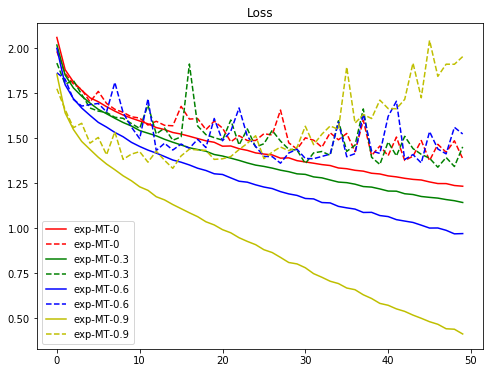

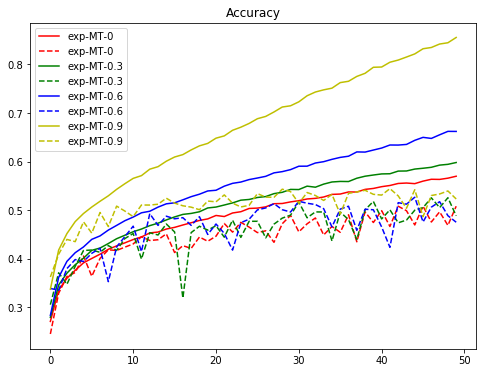

In [26]:

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()